In [1]:
import sklearn.cluster
import numpy as np
from astroquery.gaia import Gaia
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

t = Table.read('tst.hdf', format='hdf5')


/Users/anna/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/anna/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/anna/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/anna/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
X = np.array([t['ra'], t['dec'], t['parallax'], t['pmra'], t['pmdec'] ])
Xnew = np.transpose(X)
#Xcut = Xnew[:10000]

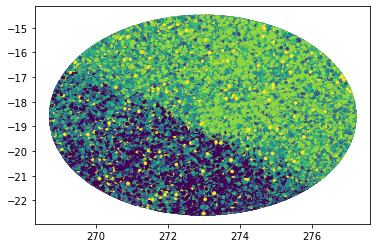

In [3]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7).fit(Xnew)
labels = gmm.predict(Xnew)
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=labels, s=7, cmap='viridis')


In [5]:
labels_2 = gmm.get_params(deep=True)
print (labels_2)

{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 7, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


In [6]:
labels_3 = gmm.predict_proba(Xnew)
print (labels_3)

[[3.98436988e-01 1.25280285e-03 2.61165118e-02 ... 4.59459993e-01
  2.34500376e-02 2.64902243e-03]
 [2.58819190e-08 4.45878568e-02 7.98990634e-01 ... 2.19329852e-04
  1.37983269e-17 1.55956215e-01]
 [9.18764484e-02 5.90501434e-03 2.69331823e-01 ... 2.38820976e-01
  3.53885123e-05 2.82144331e-02]
 ...
 [9.45518713e-02 2.81918939e-03 6.25153492e-02 ... 5.82519813e-01
  2.90119506e-03 5.00838035e-03]
 [5.88857476e-01 5.45766278e-04 9.64016657e-03 ... 2.16646343e-01
  1.79123577e-02 5.11731715e-03]
 [7.47337200e-01 3.28534021e-04 1.01887830e-02 ... 1.24338820e-01
  2.98024466e-02 1.50040223e-03]]
